[ 7  8  1 ...  4 -3  0]


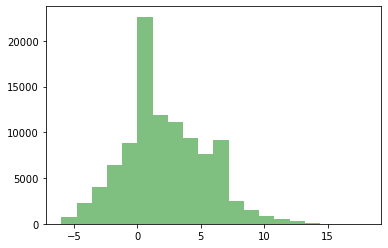

In [101]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

epsilon = 0.01
modes = ['conservative', 'aggressive']
aresults = []
cresults = []

for i in range(100000):
    
#    print("Sample " + str(i + 1))
    hiddennumber = round(random.random() , 3)
#    print('Hidden Number is ' + str(hiddennumber))

    for mode in modes:

        lowerbound = 0
        upperbound = 1
        match = 'no'
        numguesses = 1
        guesses = []
        
        while match == 'no':

            if mode == 'conservative':
                guess = round((lowerbound + upperbound) / 2 , 3)
                guesses.append(guess)
            else:
                guess = round(random.random() * (upperbound - lowerbound) + lowerbound , 3)
                guesses.append(guess)

            if abs(guess - hiddennumber) <= epsilon:
                match = 'yes'
#                print('In ' + mode + ' mode, it took you this many guesses: ' + str(numguesses))
#                print('Guesses: ' + str(guesses))
                if mode == 'conservative':
                    cresults.append(numguesses)
                else:
                    aresults.append(numguesses)
            elif guess > hiddennumber:
                upperbound = guess
                numguesses += 1        
            else:
                lowerbound = guess
                numguesses += 1
 
carray = np.array(cresults)
aarray = np.array(aresults)
diff = np.subtract(aresults, cresults)
print(diff)

num_bins = 20
n, bins, patches = plt.hist(diff, num_bins, facecolor='green', alpha=0.5)
plt.show()